In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [5]:
len(df)

2930

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

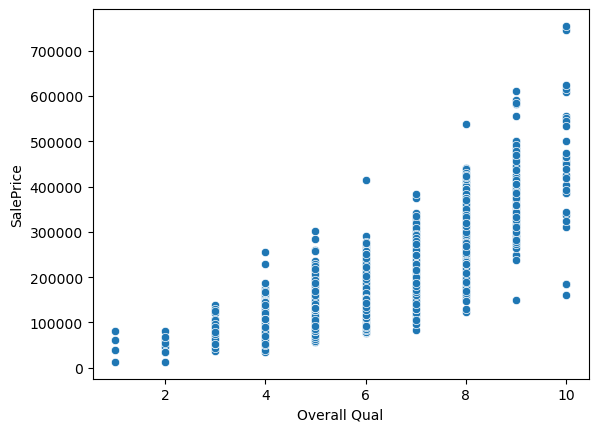

In [6]:
sns.scatterplot(x='Overall Qual' , y='SalePrice' , data=df) 

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

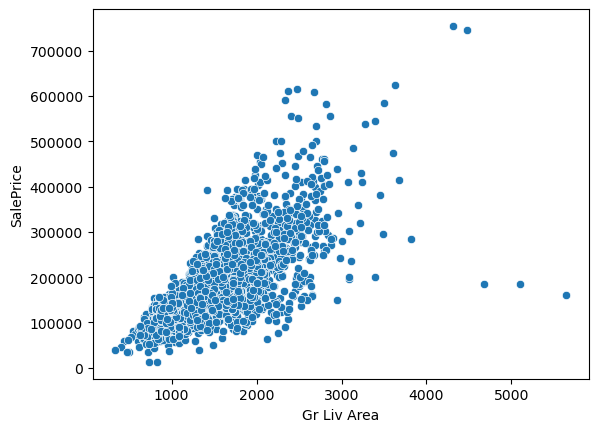

In [7]:
sns.scatterplot(x='Gr Liv Area' , y='SalePrice' , data=df)

In [8]:
df[ (df['Overall Qual']>8)& (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
drop_ind = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice']<400000)].index
drop_ind

Index([1498, 2180, 2181], dtype='int64')

In [10]:
df=df.drop(drop_ind,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

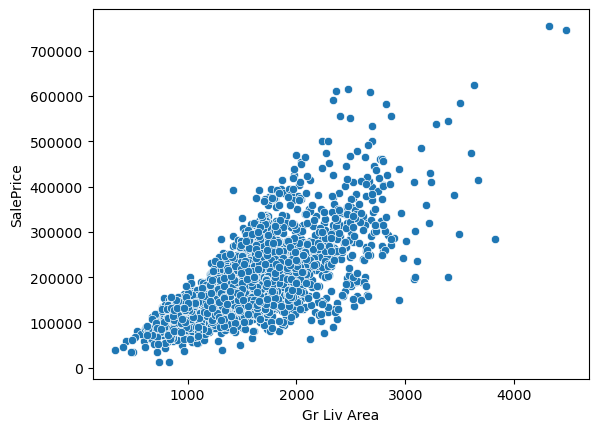

In [11]:
sns.scatterplot(x='Gr Liv Area' , y='SalePrice' , data=df)
#removed the outliers

In [12]:
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [13]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [14]:
#PID is not affecting our SalePrice so we can drop
df=df.drop('PID',axis=1)

In [15]:
def missing_percent(df):
    percent_nan = 100*df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [16]:
percent_nan = missing_percent(df)

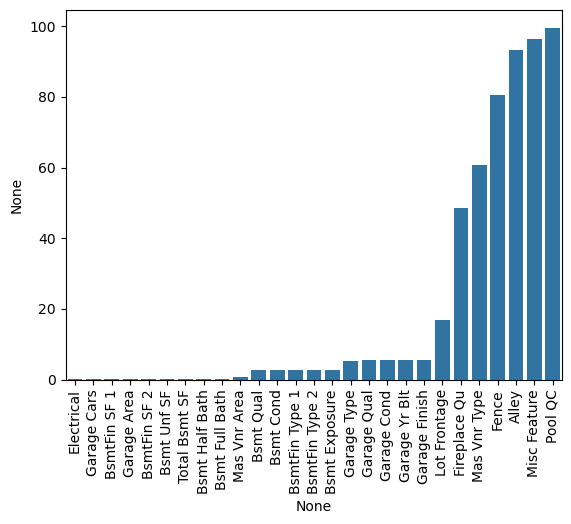

In [17]:
sns.barplot(x=percent_nan.index , y=percent_nan)
plt.xticks(rotation = 90);

In [18]:
dropping=percent_nan[percent_nan < 5].index
#less than 5 percent data missing

In [19]:
df=df.drop(dropping , axis=1)

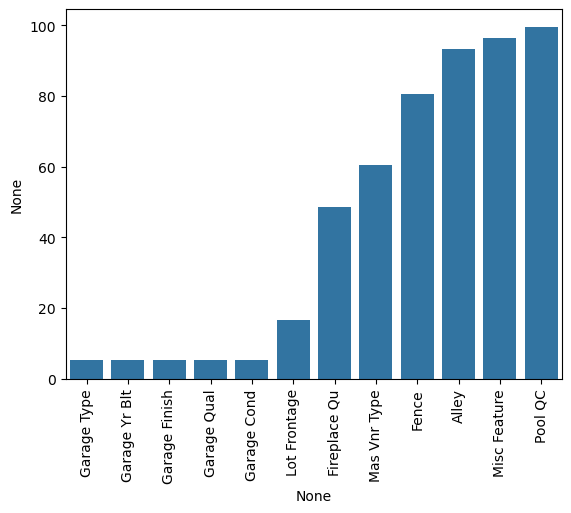

In [20]:
percent_nan = missing_percent(df)
sns.barplot(x=percent_nan.index , y=percent_nan)
plt.xticks(rotation = 90);

In [21]:
gar_str_cols = ['Garage Type' , 'Garage Yr Blt' , 'Garage Finish' , 'Garage Qual']

In [22]:
df[gar_str_cols]=df[gar_str_cols].fillna('None')

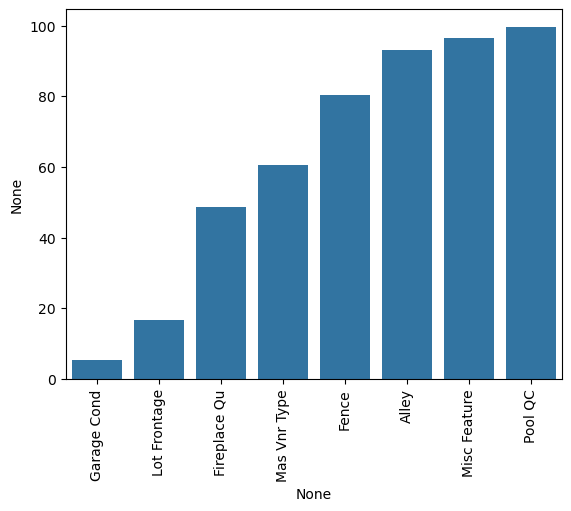

In [23]:
percent_nan = missing_percent(df)
sns.barplot(x=percent_nan.index , y=percent_nan)
plt.xticks(rotation = 90);

In [24]:
df['Garage Cond'].dropna(axis=0)

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
2924    TA
2925    TA
2926    TA
2928    TA
2929    TA
Name: Garage Cond, Length: 2768, dtype: object

In [25]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale

In [26]:
df['Garage Yr Blt'].fillna(0)

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927      None
2928    1975.0
2929    1993.0
Name: Garage Yr Blt, Length: 2927, dtype: object

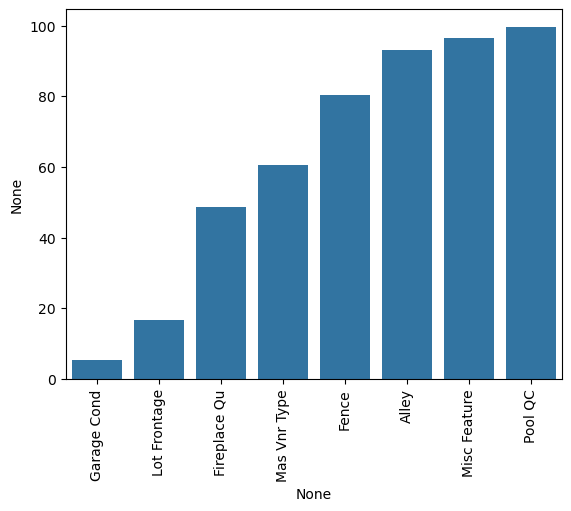

In [27]:
percent_nan = missing_percent(df)
sns.barplot(x=percent_nan.index , y=percent_nan)
plt.xticks(rotation = 90);

In [28]:
df=df.drop(['Pool QC' , 'Misc Feature' , 'Alley' , 'Fence' , 'Mas Vnr Type'], axis=1)

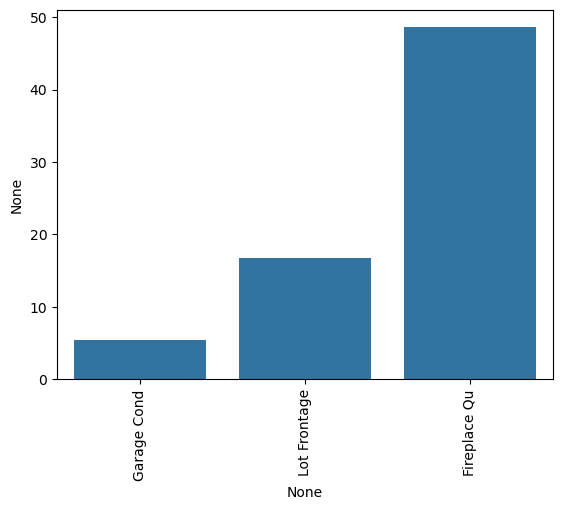

In [29]:
percent_nan = missing_percent(df)
sns.barplot(x=percent_nan.index , y=percent_nan)
plt.xticks(rotation = 90);

In [31]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna("None")

In [32]:
df = df.drop(columns=["Garage Cond"])

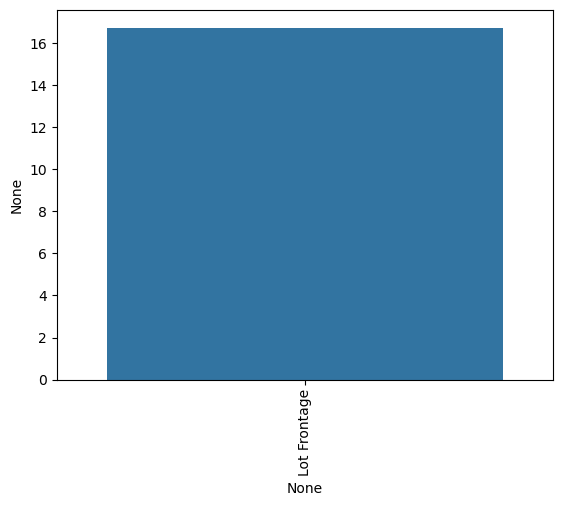

In [33]:
percent_nan = missing_percent(df)
sns.barplot(x=percent_nan.index , y=percent_nan)
plt.xticks(rotation = 90);

In [34]:
df['Lot Frontage']
#assuming the LotFrontage depends on Neighborhood

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2927, dtype: float64

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

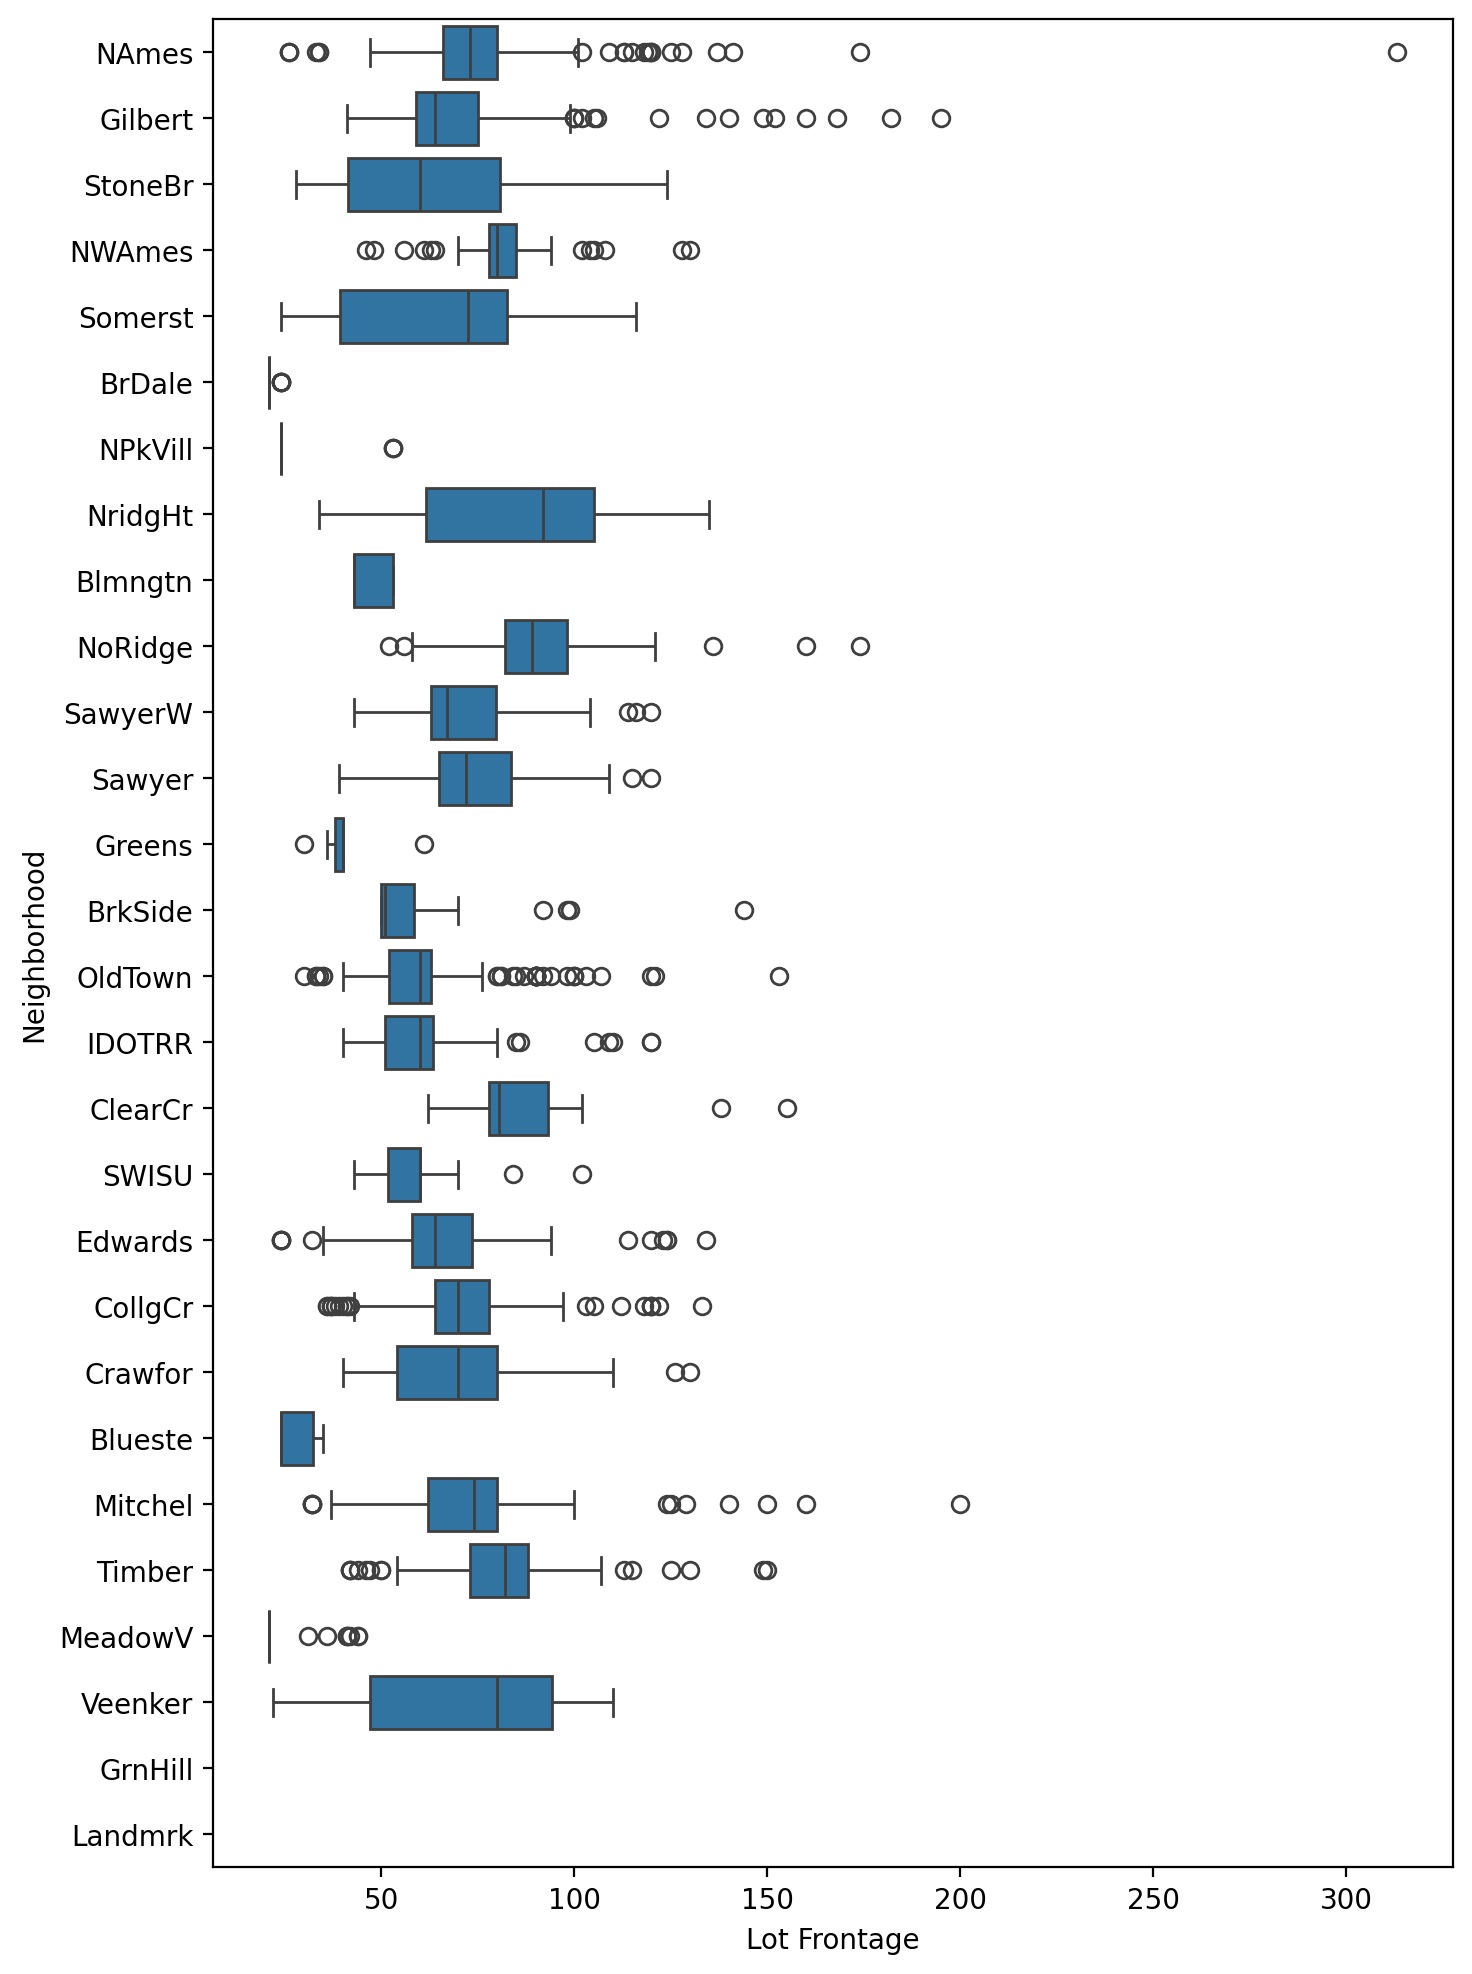

In [35]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage' , y='Neighborhood' , data=df)

In [36]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [37]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform( lambda x : x.fillna(x.mean()))

In [38]:
df.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       3
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Qual        0
Paved Drive        0
Wood Deck SF 

In [39]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [40]:
df_no_missing=df.copy()

In [41]:
df_no_missing.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Qual        0
Paved Drive        0
Wood Deck SF 

In [42]:
df['MS SubClass']=df['MS SubClass'].apply(str)

In [43]:
object_df=df.select_dtypes(include='object')
numeric_df=df.select_dtypes(exclude='object')

In [44]:
df_object_dummies = pd.get_dummies(object_df , drop_first = True)

In [45]:
final_df = pd.concat([df_object_dummies , numeric_df] , axis =1)

In [46]:
final_df.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,False,False,False,False,True,False,False,False,False,False,...,210,62,0,0,0,0,0,5,2010,215000
1,False,False,False,False,True,False,False,False,False,False,...,140,0,0,0,120,0,0,6,2010,105000
2,False,False,False,False,True,False,False,False,False,False,...,393,36,0,0,0,0,12500,6,2010,172000
3,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,4,2010,244000
4,False,False,False,False,False,False,False,False,False,True,...,212,34,0,0,0,0,0,3,2010,189900


In [47]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA        -0.591461
Kitchen Qual_TA      -0.527069
Fireplace Qu_None    -0.481742
Garage Finish_Unf    -0.422088
Garage Type_Detchd   -0.365182
                        ...   
Year Built            0.558918
1st Flr SF            0.645589
Gr Liv Area           0.727122
Overall Qual          0.802592
SalePrice             1.000000
Name: SalePrice, Length: 328, dtype: float64

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Columns: 328 entries, MS SubClass_150 to SalePrice
dtypes: bool(302), float64(1), int64(25)
memory usage: 1.4 MB


In [49]:
X=final_df.drop('SalePrice',axis=1)
y=final_df['SalePrice']

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=101)
#0.1 for the hold out set

In [51]:
scale=StandardScaler()
scaled_X_train=scale.fit_transform(X_train)
scaled_X_test=scale.fit_transform(X_test)

In [52]:
base_elastic_net=ElasticNet()
#edit the max_iter to filter the warning while fitting model

In [53]:
param_grid={'alpha':[0.1,0.5,1,5,10,100],'l1_ratio':[0.1,0.5,0.7,1]}

In [54]:
grid_model = GridSearchCV(base_elastic_net,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2)

In [57]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.2s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [61]:
pred=grid_model.predict(scaled_X_test)

In [67]:
print(mean_absolute_error(pred,y_test))

17625.50487658389


In [68]:
np.mean(df['SalePrice'])

180800.7707550393